# ANOVA Tutorial for Intermediate Learners

In [1]:
# 📌 Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Display settings
sns.set(style="whitegrid")
%matplotlib inline

### 🧪 Simulated Dataset

In [2]:
# Create a sample dataset
np.random.seed(42)

# Groups A, B, and C with different means
group_A = np.random.normal(loc=60, scale=10, size=30)
group_B = np.random.normal(loc=65, scale=10, size=30)
group_C = np.random.normal(loc=70, scale=10, size=30)

# Combine into a DataFrame
df = pd.DataFrame({
    'score': np.concatenate([group_A, group_B, group_C]),
    'group': ['A'] * 30 + ['B'] * 30 + ['C'] * 30
})

df.head()

,score,group
0,64.967142,A
1,58.617357,A
2,66.476885,A
3,75.230299,A
4,57.658466,A


### 📊 Visualizing the Data

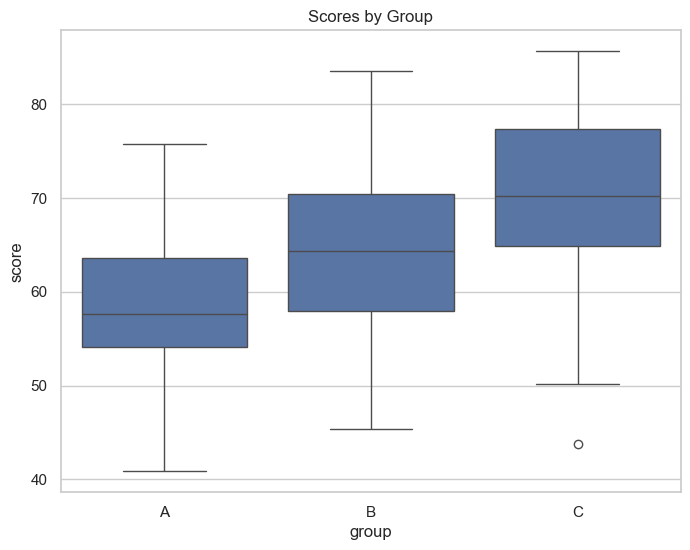

In [3]:
# Boxplot for visualizing group differences
plt.figure(figsize=(8, 6))
sns.boxplot(x='group', y='score', data=df)
plt.title("Scores by Group")
plt.show()

### 🔎 One-Way ANOVA with `scipy.stats`

In [4]:
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(
    df[df['group'] == 'A']['score'],
    df[df['group'] == 'B']['score'],
    df[df['group'] == 'C']['score']
)

print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 12.20952551797281
P-value: 2.1200748140507065e-05


### 📐 ANOVA with `statsmodels` for Detailed Output

In [5]:
# Using statsmodels for full ANOVA table
model = ols('score ~ C(group)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df          F    PR(>F)
C(group)  2165.964313   2.0  12.209526  0.000021
Residual  7716.880356  87.0        NaN       NaN


### 📌 Post-hoc Analysis with Tukey HSD

In [6]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey HSD test to see which pairs differ
tukey = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   5.6698 0.0567 -0.1286 11.4683  False
     A      C  12.0103    0.0  6.2119 17.8087   True
     B      C   6.3405 0.0287  0.5421 12.1389   True
----------------------------------------------------


### 📈 Plotting Tukey Results

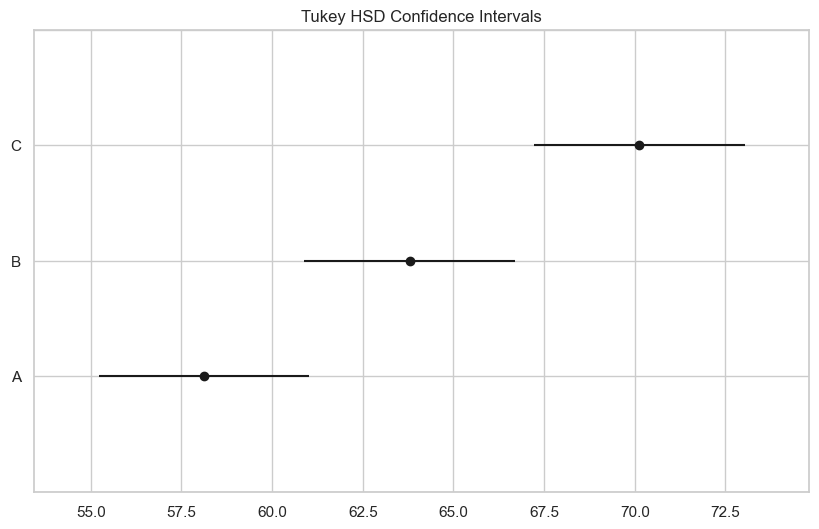

In [7]:
tukey.plot_simultaneous()
plt.title("Tukey HSD Confidence Intervals")
plt.show()

### 🔄 Recap for Intermediate Learners
- ✅ One-way ANOVA tests for overall group differences.
- ✅ Use `scipy.stats.f_oneway()` for quick tests.
- ✅ Use `statsmodels` for detailed modeling and interpretation.
- ✅ Post-hoc tests like Tukey HSD are essential when ANOVA is significant.
- ✅ Check assumptions: **normality**, **equal variances** (use Levene's test), and **independence**.


### 🧪 Bonus: Levene’s Test for Equal Variances

In [8]:
# Check homogeneity of variances
levene_stat, levene_p = stats.levene(
    df[df['group'] == 'A']['score'],
    df[df['group'] == 'B']['score'],
    df[df['group'] == 'C']['score']
)

print("Levene's test P-value:", levene_p)

Levene's test P-value: 0.8626638812717601
